# <center> The Heaps' law of different languages

Studying the Heaps' law (number of types vs. number of tokens) in a growing text of different languages. Using text data from different sources.

### NLTK corpora data

* For **ENGLISH**: the Brown Corpus from NLTK
* For **POLISH**: the Polish Language of the XX century sixties from NLTK
* For **BRAZILIAN PORTUGUESE**: the Machado works corpus from NLTK

### Wikipedia data

Requested several pages under these queries (chosen among words expected to lead to "long" pages). For English queries are (for other languages, they are the translations):

* "History" 
* "Science"
* "Religion"

These queries have been run against the Wikipedia versions in several languages.

In [4]:
# Imports and settings

import sys
sys.path.append('../')

from nltk import corpus
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import GermanStemmer, DutchStemmer, ItalianStemmer, SpanishStemmer, EnglishStemmer
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from string import punctuation, translate
import wikipedia

# These are helper methods I defined for convenience, head to the repo to find them
from wikipedia_helpers import get_pages_content, get_random_pages_content
from tokens_helpers import separate_tokens_types
from common.fit_helpers import fit_powlaw

%matplotlib inline

rcParams['figure.figsize'] = (10, 6)

## NTLK Corpora
---

### Get the data, clean and organise and see basic stuff

* Get the NLTK corpora and their words

In [3]:
# Get the corpora from NLTK

brown_corpus = corpus.brown                 # ENGLISH, Brown Corpus
polish_corpus = corpus.pl196x               # POLISH, Polish Language of the XX century sixties
machado_corpus = corpus.machado             # BRAZILIAN PORTUGUESE, Machado works

In [4]:
# Get the words from those corpora, cleaning the useless ones and lowering case

brown_words = [word.lower() for word in brown_corpus.words() if word.isalpha()]
polish_words = [word.lower() for word in polish_corpus.words() if word.isalpha()]
machado_words = [word.lower() for word in machado_corpus.words() if word.isalpha()]

In [5]:
# Basics

print 'Total tokens in Brown Corpus (after cleaning): ', len(brown_words)
print 'Total tokens in Polish Corpus (after cleaning): ', len(polish_words) 
print 'Total tokens in Machado Corpus (after cleaning): ', len(machado_words)

Total tokens in Brown Corpus (after cleaning):  981716
Total tokens in Polish Corpus (after cleaning):  536039
Total tokens in Machado Corpus (after cleaning):  2558275


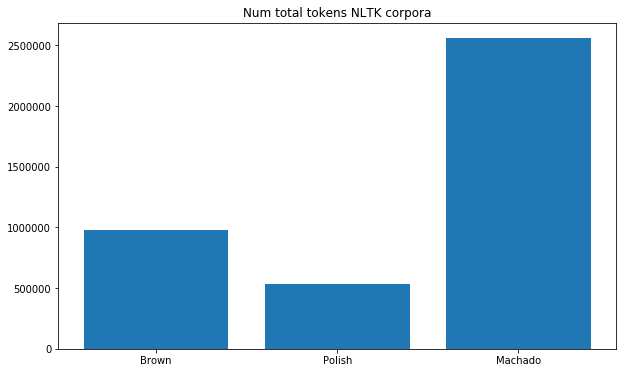

In [6]:
# Plotting these^ numbers

plt.bar([i for i in range(3)], [len(brown_words), len(polish_words), len(machado_words)])
plt.xticks([i for i in range(3)], ['Brown', 'Polish', 'Machado'])

plt.title('Num total tokens NLTK corpora')
#plt.show()
plt.savefig('num-tokens-nltk.svg')

### Count types and tokens of each corpus

In [7]:
brown_t_tokens, brown_t_types = separate_tokens_types(brown_words)
polish_t_tokens, polish_t_types = separate_tokens_types(polish_words)
machado_t_tokens, machado_t_types = separate_tokens_types(machado_words)

### Plot the Heaps' curves (linear scale)

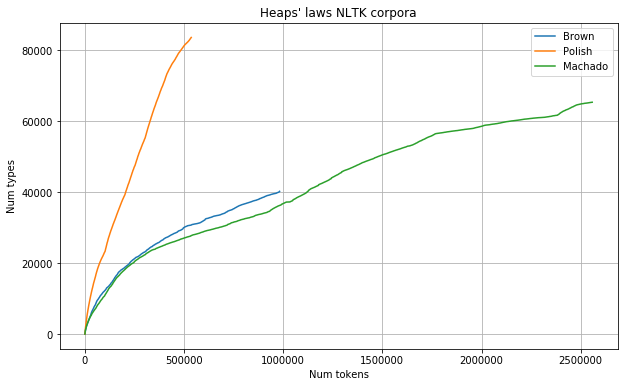

In [8]:
# Plot the Heaps' curves, linear scale

plt.plot(brown_t_tokens, brown_t_types, label='Brown')
plt.plot(polish_t_tokens, polish_t_types, label='Polish')
plt.plot(machado_t_tokens, machado_t_types, label='Machado')

plt.grid()
plt.legend()
plt.title("Heaps' laws NLTK corpora")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
plt.show()
#plt.savefig('heaps-nltk-linear.svg')

### Fit them and plot in log scale alongside the fit

In [104]:
# For Brown, fit with and without excluding a starting part of 250k tokens 
# (to roughly exclude the linear growth starting part)
# Fit the others with the cut 
brown_p_fit_nocut = fit_powlaw(brown_t_tokens, brown_t_types)
print 'Fit params Brown without cut at start: ', brown_p_fit_nocut[0]

brown_p_fit = fit_powlaw(brown_t_tokens, brown_t_types, start=250000)
print 'Fit params Brown: ', brown_p_fit[0]

polish_p_fit = fit_powlaw(polish_t_tokens, polish_t_types, start=250000)
print 'Fit params Polish: ', polish_p_fit[0]

machado_p_fit = fit_powlaw(machado_t_tokens, machado_t_types)
print 'Fit params Machado: ', machado_p_fit[0]

Fit params Brown without cut at start:  [ 1.19514617  0.57408298]
Fit params Brown:  [ 1.86904579  0.45635654]
Fit params Polish:  [ 0.50497351  0.77430629]
Fit params Machado:  [ 1.2510064   0.55720109]


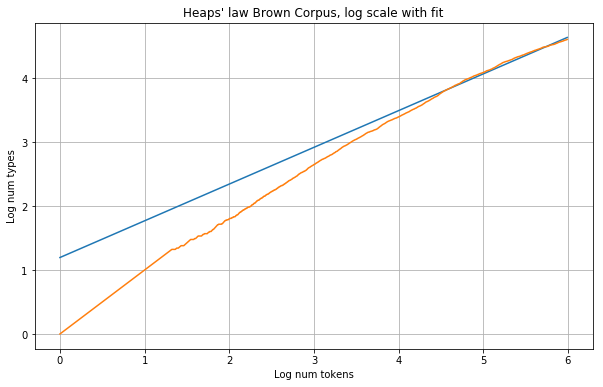

In [105]:
# Plot data and fit, just Brown corpus, without the cut
# This is supposed to show the deviation from the linear part

plt.plot(np.log10(brown_t_tokens), brown_p_fit_nocut[0][0] + brown_p_fit_nocut[0][1] * np.log10(brown_t_tokens))
plt.plot(np.log10(brown_t_tokens), np.log10(brown_t_types))
plt.grid()

plt.xlabel('Log num tokens')
plt.ylabel('Log num types')
plt.title("Heaps' law Brown Corpus, log scale with fit")
plt.show()
#plt.savefig('heaps-log-brown-all.svg')

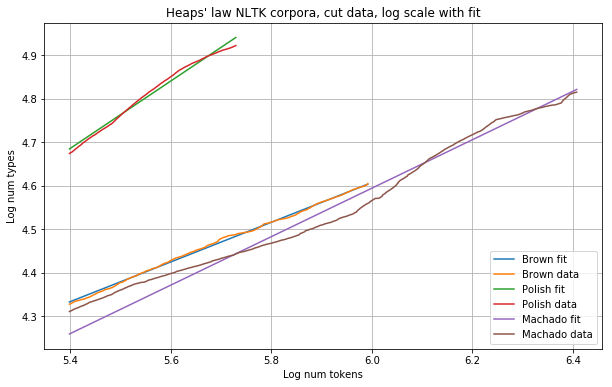

In [107]:
# Plot data and fit, all corpora, with cut of the starting part

plt.plot(np.log10(brown_t_tokens[250000:]), brown_p_fit[0][0] + brown_p_fit[0][1] * np.log10(brown_t_tokens[250000:]), 
            label='Brown fit')
plt.plot(np.log10(brown_t_tokens[250000:]), np.log10(brown_t_types[250000:]), label='Brown data')

plt.plot(np.log10(polish_t_tokens[250000:]), 
         polish_p_fit[0][0] + polish_p_fit[0][1] * np.log10(polish_t_tokens[250000:]), label='Polish fit')
plt.plot(np.log10(polish_t_tokens[250000:]), np.log10(polish_t_types[250000:]), label='Polish data')

plt.plot(np.log10(machado_t_tokens[250000:]), 
         machado_p_fit[0][0] + machado_p_fit[0][1] * np.log10(machado_t_tokens[250000:]), label='Machado fit')
plt.plot(np.log10(machado_t_tokens[250000:]), np.log10(machado_t_types[250000:]), label='Machado data')

plt.grid()

plt.legend()
plt.xlabel('Log num tokens')
plt.ylabel('Log num types')
plt.title("Heaps' law NLTK corpora, cut data, log scale with fit")
plt.show()
#plt.savefig('heaps-log-nltk-cut.svg')

## Wikipedia data
---

Request pages for bespoke queries in the chosen languages, filling a dictionary of content by page title. We will first use all tokens as they are and later stem them where we can.

### Request content of pages from different languages Wikipedias

We'll use the queries for "history", "science" and "religion" in all languages, but as the Latin and the Polish corpora end up being too small, we add to them by requesting further random pages.

In [17]:
en_contents = get_pages_content(['history', 'science', 'religion'], lang_code='en')

Requesting pages on the en Wikipedia ...
history 0


/usr/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /usr/local/Cellar/python/2.7.10/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


history 100
history 200
history 300
history 400
science 0
science 100
science 200
science 300
science 400
religion 0
religion 100
religion 200
religion 300
religion 400


In [18]:
pl_contents = get_pages_content(['historia', 'nauka', 'religia'], lang_code='pl')

Requesting pages on the pl Wikipedia ...
historia 0
historia 100
historia 200
historia 300
historia 400
nauka 0
nauka 100
nauka 200
nauka 300
nauka 400
religia 0
religia 100
religia 200
religia 300
religia 400


In [87]:
pl_contents.update(get_random_pages_content(lang_code='pl', num_pages=500))

Requesting random pages on the pl Wikipedia ...
0
100
200
300
400


In [19]:
ger_contents = get_pages_content(['geschichte', 'wissenschaft', 'religion'], lang_code='de')

Requesting pages on the de Wikipedia ...
geschichte 0
geschichte 100
geschichte 200
geschichte 300
geschichte 400
wissenschaft 0
wissenschaft 100
wissenschaft 200
wissenschaft 300
wissenschaft 400
religion 0
religion 100
religion 200
religion 300
religion 400


In [20]:
it_contents = get_pages_content(['storia', 'scienza', 'religione'], lang_code='it')

Requesting pages on the it Wikipedia ...
storia 0
storia 100
storia 200
storia 300
storia 400
scienza 0
scienza 100
scienza 200
scienza 300
scienza 400
religione 0
religione 100
religione 200
religione 300
religione 400


In [46]:
la_contents = get_pages_content(['historia', 'scientia', 'religio'], lang_code='la')

Requesting pages on the la Wikipedia ...
historia 0
historia 100
historia 200
historia 300
historia 400


WikipediaException: An unknown error occured: "We could not complete your search due to a temporary problem. Please try again later.". Please report it on GitHub!

In [66]:
la_contents.update(get_random_pages_content(lang_code='la', num_pages=1000))

Requesting random pages on the la Wikipedia ...
0
100
200
300
400


In [34]:
es_contents = get_pages_content(['historia', 'ciencia', 'religión'], lang_code='es')

Requesting pages on the es Wikipedia ...
historia 0
historia 100
historia 200
historia 300
historia 400
ciencia 0
ciencia 100
ciencia 200
ciencia 300
ciencia 400
religión 0
religión 100
religión 200
religión 300
religión 400


In [23]:
nl_contents = get_pages_content(['geschiedenis', 'wetenschap', 'religie'], lang_code='nl')

Requesting pages on the nl Wikipedia ...
geschiedenis 0
geschiedenis 100
geschiedenis 200
geschiedenis 300
geschiedenis 400
wetenschap 0
wetenschap 100
wetenschap 200
wetenschap 300
wetenschap 400
religie 0
religie 100
religie 200
religie 300
religie 400


### How many pages we got for every language

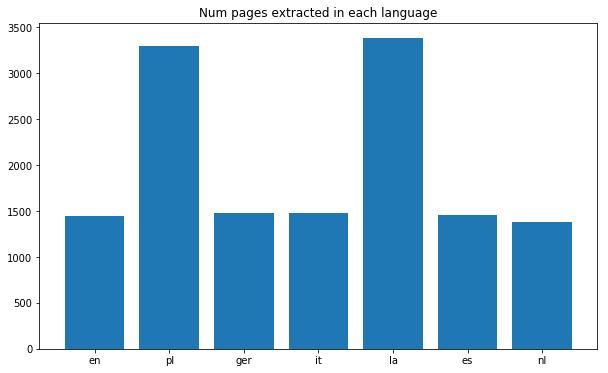

In [92]:
# Plot num of pages extracted in each language

plt.bar([i for i in range(7)], 
         [len(en_contents), len(pl_contents), len(ger_contents), len(it_contents),
          len(la_contents), len(es_contents), len(nl_contents)])
plt.xticks([i for i in range(7)], ['en', 'pl', 'ger', 'it', 'la', 'es', 'nl'])
plt.title('Num pages extracted in each language')
#plt.show()

### Create the corpora for each language

Just concatenate all content strings

In [88]:
en_wiki_corpus = ' '.join(en_contents.values())
pl_wiki_corpus = ' '.join(pl_contents.values())
ger_wiki_corpus = ' '.join(ger_contents.values())
it_wiki_corpus = ' '.join(it_contents.values())
la_wiki_corpus = ' '.join(la_contents.values())
es_wiki_corpus = ' '.join(es_contents.values())
nl_wiki_corpus = ' '.join(nl_contents.values())

### Get the words

Have to tokenize. Use wordpunct_tokenize as it separates punctuation out.

In [89]:
en_wiki_words = [word.lower() for word in wordpunct_tokenize(en_wiki_corpus) if word.isalpha()]
pl_wiki_words = [word.lower() for word in wordpunct_tokenize(pl_wiki_corpus) if word.isalpha()]
ger_wiki_words = [word.lower() for word in wordpunct_tokenize(ger_wiki_corpus) if word.isalpha()]
it_wiki_words = [word.lower() for word in wordpunct_tokenize(it_wiki_corpus) if word.isalpha()]
la_wiki_words = [word.lower() for word in wordpunct_tokenize(la_wiki_corpus) if word.isalpha()]
es_wiki_words = [word.lower() for word in wordpunct_tokenize(es_wiki_corpus) if word.isalpha()]
nl_wiki_words = [word.lower() for word in wordpunct_tokenize(nl_wiki_corpus) if word.isalpha()]

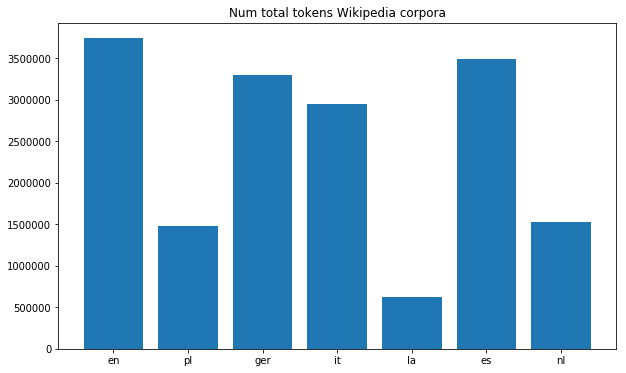

In [94]:
# Plot the number of tokens obtained in each language

plt.bar([i for i in range(7)], 
         [len(en_wiki_words), len(pl_wiki_words), len(ger_wiki_words), len(it_wiki_words),
          len(la_wiki_words), len(es_wiki_words), len(nl_wiki_words)])
plt.xticks([i for i in range(7)], ['en', 'pl', 'ger', 'it', 'la', 'es', 'nl'])
plt.title('Num total tokens Wikipedia corpora')
plt.savefig('num-tokens-wikipedia.svg')
#plt.show()

### Count number of tokens and types for each wiki list

In [95]:
en_wiki_t_tokens, en_wiki_t_types = separate_tokens_types(en_wiki_words)
pl_wiki_t_tokens, pl_wiki_t_types = separate_tokens_types(pl_wiki_words)
ger_wiki_t_tokens, ger_wiki_t_types = separate_tokens_types(ger_wiki_words)
it_wiki_t_tokens, it_wiki_t_types = separate_tokens_types(it_wiki_words)
la_wiki_t_tokens, la_wiki_t_types = separate_tokens_types(la_wiki_words)
es_wiki_t_tokens, es_wiki_t_types = separate_tokens_types(es_wiki_words)
nl_wiki_t_tokens, nl_wiki_t_types = separate_tokens_types(nl_wiki_words)

### Plot the Heaps

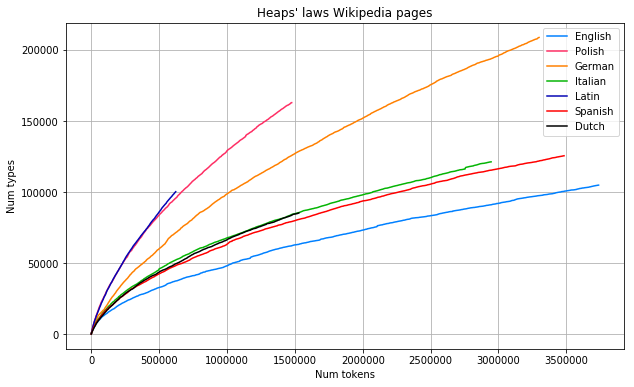

In [140]:
# Plot the Heaps' curves, linear scale

plt.plot(en_wiki_t_tokens, en_wiki_t_types, c='#0080FF', label='English')
#plt.plot(brown_t_tokens, brown_t_types, label='Brown')

plt.plot(pl_wiki_t_tokens, pl_wiki_t_types, c='#FE2E64', label='Polish')
#plt.plot(polish_t_tokens, polish_t_types, label='Polish NLTK')

plt.plot(ger_wiki_t_tokens, ger_wiki_t_types, c='#FF8000', label='German')

plt.plot(it_wiki_t_tokens, it_wiki_t_types, c='#04B404', label='Italian')

plt.plot(la_wiki_t_tokens, la_wiki_t_types, c='#0404B4', label='Latin')

plt.plot(es_wiki_t_tokens, es_wiki_t_types, c='#FF0000', label='Spanish')

plt.plot(nl_wiki_t_tokens, nl_wiki_t_types, color='black', label='Dutch')

plt.grid()
plt.legend()
plt.title("Heaps' laws Wikipedia pages")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
#plt.show()
plt.savefig('heaps-wiki-linear.svg')

### Fit them and plot in logscale with fit

In [99]:
en_wiki_p_fit = fit_powlaw(en_wiki_t_tokens, en_wiki_t_types, start=250000)
print 'Fit params EN wiki: ', en_wiki_p_fit[0]

pl_wiki_p_fit = fit_powlaw(pl_wiki_t_tokens, pl_wiki_t_types, start=250000)
print 'Fit params PL wiki: ', pl_wiki_p_fit[0]

ger_wiki_p_fit = fit_powlaw(ger_wiki_t_tokens, ger_wiki_t_types, start=250000)
print 'Fit params GER wiki: ', ger_wiki_p_fit[0]

it_wiki_p_fit = fit_powlaw(it_wiki_t_tokens, it_wiki_t_types, start=250000)
print 'Fit params IT wiki: ', it_wiki_p_fit[0]

la_wiki_p_fit = fit_powlaw(la_wiki_t_tokens, la_wiki_t_types, start=250000)
print 'Fit params LA wiki: ', la_wiki_p_fit[0]

es_wiki_p_fit = fit_powlaw(es_wiki_t_tokens, es_wiki_t_types, start=250000)
print 'Fit params ES wiki: ', es_wiki_p_fit[0]

nl_wiki_p_fit = fit_powlaw(nl_wiki_t_tokens, nl_wiki_t_types, start=250000)
print 'Fit params NL wiki: ', nl_wiki_p_fit[0]

Fit params EN wiki:  [ 1.23435895  0.57611957]
Fit params PL wiki:  [ 1.33656071  0.62875742]
Fit params GER wiki:  [ 1.05244301  0.65538451]
Fit params IT wiki:  [ 1.49159595  0.55567562]
Fit params LA wiki:  [ 0.99847931  0.69060643]
Fit params ES wiki:  [ 1.41811828  0.56358396]
Fit params NL wiki:  [ 1.18193168  0.60658303]


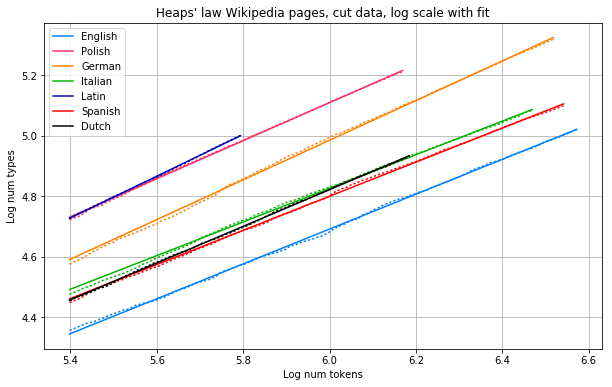

In [139]:
# Plot data and fit

plt.plot(np.log10(en_wiki_t_tokens[250000:]), 
         en_wiki_p_fit[0][0] + en_wiki_p_fit[0][1] * np.log10(en_wiki_t_tokens[250000:]), 
         c='#0080FF', label='English')
plt.plot(np.log10(en_wiki_t_tokens[250000:]), np.log10(en_wiki_t_types[250000:]), 
         ls=':', c='#0080FF')

plt.plot(np.log10(pl_wiki_t_tokens[250000:]), 
         pl_wiki_p_fit[0][0] + pl_wiki_p_fit[0][1] * np.log10(pl_wiki_t_tokens[250000:]), 
         c='#FE2E64', label='Polish')
plt.plot(np.log10(pl_wiki_t_tokens[250000:]), np.log10(pl_wiki_t_types[250000:]), 
         ls=':', c ='#FE2E64')

plt.plot(np.log10(ger_wiki_t_tokens[250000:]), 
         ger_wiki_p_fit[0][0] + ger_wiki_p_fit[0][1] * np.log10(ger_wiki_t_tokens[250000:]), 
         c='#FF8000', label='German')
plt.plot(np.log10(ger_wiki_t_tokens[250000:]), np.log10(ger_wiki_t_types[250000:]), 
         ls=':', c='#FF8000')

plt.plot(np.log10(it_wiki_t_tokens[250000:]), 
         it_wiki_p_fit[0][0] + it_wiki_p_fit[0][1] * np.log10(it_wiki_t_tokens[250000:]), 
         c='#04B404', label='Italian')
plt.plot(np.log10(it_wiki_t_tokens[250000:]), np.log10(it_wiki_t_types[250000:]), 
         ls=':', c='#04B404')

plt.plot(np.log10(la_wiki_t_tokens[250000:]), 
         la_wiki_p_fit[0][0] + la_wiki_p_fit[0][1] * np.log10(la_wiki_t_tokens[250000:]), 
         c='#0404B4', label='Latin')
plt.plot(np.log10(la_wiki_t_tokens[250000:]), np.log10(la_wiki_t_types[250000:]), 
         ls=':', c='#0404B4')

plt.plot(np.log10(es_wiki_t_tokens[250000:]), 
         es_wiki_p_fit[0][0] + es_wiki_p_fit[0][1] * np.log10(es_wiki_t_tokens[250000:]), 
         c='#FF0000', label='Spanish')
plt.plot(np.log10(es_wiki_t_tokens[250000:]), np.log10(es_wiki_t_types[250000:]),
         ls=':', c='#FF0000')

plt.plot(np.log10(nl_wiki_t_tokens[250000:]), 
         nl_wiki_p_fit[0][0] + nl_wiki_p_fit[0][1] * np.log10(nl_wiki_t_tokens[250000:]), 
         c='black', label='Dutch')
plt.plot(np.log10(nl_wiki_t_tokens[250000:]), np.log10(nl_wiki_t_types[250000:]), 
         ls=':', c='black')

plt.grid()

plt.legend()
plt.xlabel('Log num tokens')
plt.ylabel('Log num types')
plt.title("Heaps' law Wikipedia pages, cut data, log scale with fit")
#plt.show()
plt.savefig('heaps-log-wiki-cut.svg')

### Stemming the tokens here and refitting

In [143]:
# Define all stemmers (those we have access to)

en_stemmer = EnglishStemmer()
ger_stemmer = GermanStemmer()
it_stemmer = ItalianStemmer()
es_stemmer = SpanishStemmer()
nl_stemmer = DutchStemmer()

In [149]:
# Stem the corpora

en_wiki_words_stemmed = [en_stemmer.stem(word) for word in en_wiki_words]
ger_wiki_words_stemmed = [ger_stemmer.stem(word) for word in ger_wiki_words]
it_wiki_words_stemmed = [it_stemmer.stem(word) for word in it_wiki_words]
es_wiki_words_stemmed = [es_stemmer.stem(word) for word in es_wiki_words]
nl_wiki_words_stemmed = [nl_stemmer.stem(word) for word in nl_wiki_words]

In [152]:
# Counting types and tokens for the stemmed versions

en_wiki_t_tokens_stemmed, en_wiki_t_types_stemmed = separate_tokens_types(en_wiki_words_stemmed)
ger_wiki_t_tokens_stemmed, ger_wiki_t_types_stemmed = separate_tokens_types(ger_wiki_words_stemmed)
it_wiki_t_tokens_stemmed, it_wiki_t_types_stemmed = separate_tokens_types(it_wiki_words_stemmed)
es_wiki_t_tokens_stemmed, es_wiki_t_types_stemmed = separate_tokens_types(es_wiki_words_stemmed)
nl_wiki_t_tokens_stemmed, nl_wiki_t_types_stemmed = separate_tokens_types(nl_wiki_words_stemmed)

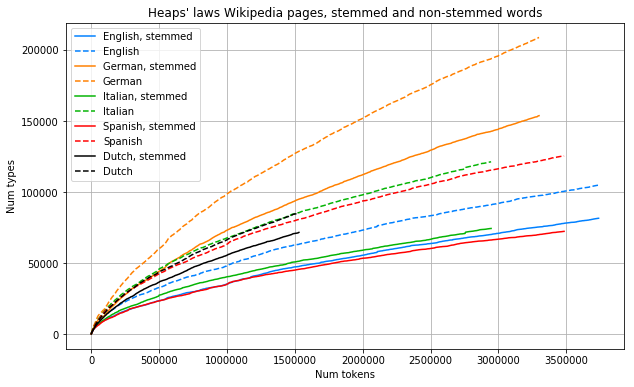

In [157]:
# Plot the Heaps' curves, linear scale, stemmed versions and non-stemmed ones

plt.plot(en_wiki_t_tokens_stemmed, en_wiki_t_types_stemmed, c='#0080FF', label='English, stemmed')
plt.plot(en_wiki_t_tokens, en_wiki_t_types, c='#0080FF', ls='--',  label='English')

plt.plot(ger_wiki_t_tokens_stemmed, ger_wiki_t_types_stemmed, c='#FF8000', label='German, stemmed')
plt.plot(ger_wiki_t_tokens, ger_wiki_t_types, c='#FF8000', ls='--', label='German')

plt.plot(it_wiki_t_tokens_stemmed, it_wiki_t_types_stemmed, c='#04B404', label='Italian, stemmed')
plt.plot(it_wiki_t_tokens, it_wiki_t_types, c='#04B404', ls='--', label='Italian')

plt.plot(es_wiki_t_tokens_stemmed, es_wiki_t_types_stemmed, c='#FF0000', label='Spanish, stemmed')
plt.plot(es_wiki_t_tokens, es_wiki_t_types, c='#FF0000', ls='--', label='Spanish')

plt.plot(nl_wiki_t_tokens_stemmed, nl_wiki_t_types_stemmed, color='black', label='Dutch, stemmed')
plt.plot(nl_wiki_t_tokens, nl_wiki_t_types, color='black', ls='--', label='Dutch')

plt.grid()
plt.legend()
plt.title("Heaps' laws Wikipedia pages, stemmed and non-stemmed words")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
#plt.show()
plt.savefig('heaps-wiki-linear-stemmed.svg')

In [158]:
# Fit the stemmed versions

en_wiki_p_fit_stemmed = fit_powlaw(en_wiki_t_tokens_stemmed, en_wiki_t_types_stemmed, start=250000)
print 'Fit params EN wiki, stemmed: ', en_wiki_p_fit_stemmed[0]

ger_wiki_p_fit_stemmed = fit_powlaw(ger_wiki_t_tokens_stemmed, ger_wiki_t_types_stemmed, start=250000)
print 'Fit params GER wiki, stemmed: ', ger_wiki_p_fit_stemmed[0]

it_wiki_p_fit_stemmed = fit_powlaw(it_wiki_t_tokens_stemmed, it_wiki_t_types_stemmed, start=250000)
print 'Fit params IT wiki, stemmed: ', it_wiki_p_fit_stemmed[0]

es_wiki_p_fit_stemmed = fit_powlaw(es_wiki_t_tokens_stemmed, es_wiki_t_types_stemmed, start=250000)
print 'Fit params ES wiki, stemmed: ', es_wiki_p_fit[0]

nl_wiki_p_fit_stemmed = fit_powlaw(nl_wiki_t_tokens_stemmed, nl_wiki_t_types_stemmed, start=250000)
print 'Fit params NL wiki, stemmed: ', nl_wiki_p_fit_stemmed[0]

Fit params EN wiki, stemmed:  [ 0.87028315  0.61485176]
Fit params GER wiki, stemmed:  [ 0.92192429  0.65510561]
Fit params IT wiki, stemmed:  [ 1.19605312  0.56772038]
Fit params ES wiki, stemmed:  [ 1.41811828  0.56358396]
Fit params NL wiki, stemmed:  [ 1.10823823  0.60597251]
